<div align="center">

# Programming for Data Analytics Project
## Residential Property Price Register Analysis
***

</div>

<p align="center">
    <img width="959" height="539" src="./images/housing_predictions.webp" alt="Sublime's custom image"/
    >
    </p>

###### [Image from Forbes.com](https://www.forbes.com/advisor/mortgages/real-estate/housing-market-predictions/)

### Table of Contents


1. About the Project
   
2. Import Libraries
   
3. Load Data

4. Data Exploration
   
    4.1  Check for the DataFrame

    4.2  Check for the DataFrame dimensionality with pandas .info() method

    4.3  Generate descriptive statistics with pandas .describe method

    4.4  Check for missing values   

5. Data Analysis
   
    5.1  Analysis of Property Prices in Ireland (2010-2024)
    
     - 5.1.1    Average property prices by county

     - 5.1.2    Number of property sales by county

     - 5.1.3    Average property prices by year

     - 5.1.4    Average property prices by month

     - 5.1.5    Number of occurrences of each property type

     - 5.1.6    Average property prices by property type (2010-2024)

     - 5.1.7    Full Market price comparison

     - 5.1.8    County with the highest and lowest average property prices
  
    5.2 Analysis of Property Prices in Mayo (2010-2024)
 
     - 5.2.1    Data Preparation for Analysis

     - 5.2.2    Average Mayo Property Price by Year

     - 5.2.3    Average Mayo Property Price by Month

     - 5.2.4    Average Mayo Property Price by month in 2024

     - 5.2.5    Number of property sales in Mayo in 2024

     - 5.2.6    Number of occurrences of each property type in Mayo

     - 5.2.7    Average property price by property type in Mayo in 2024

     - 5.2.8    Full Market price comparison in Mayo




6.  References

### 1. About the Project
***

### 2. Import the Libraries
***

I imported the following libraries to plot the dataset.

- `matplotlib.pyplot`: Essential for creating static, animated, and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.
- `numpy`: It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.
- `pandas`: Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.
- `seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- `datetime`: The datetime is a built-in module that provides classes for manipulating dates and times
- `re`: The re module provides a set of functions to work with regular expressions, used for searching, matching, and manipulating strings.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import re

### 3. Load the Data
***
Load the dataset from the Residential Property Price Register website https://www.propertypriceregister.ie/


In [3]:
df=pd.read_csv("./data/ppr_all.csv")

C:\Users\curleys\AppData\Local\Temp\ipykernel_25540\1623581419.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./data/ppr_all.csv")


### 4. Data Exploration
***

#### 4.1 Check the dataframe using df.head

Lets have an initial glance at the data

In [4]:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


#### 4.2  Check for the DataFrame dimensionality with pandas .info() method

The .info() method in Pandas provides valuable insights about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). The info() method does not return any value, it prints the information. [[1]](https://www.w3schools.com/python/pandas/ref_df_info.asp) 

The output of the .info() method consists of several key components: [[2]](https://machinelearningtutorials.org/a-comprehensive-guide-to-using-the-pandas-dataframe-info-method/)

- The total number of rows (entries) in the DataFrame.

- A summary of each column, including:
  - The column name
  - The number of non-null values
  - The data type of the column
  - The memory usage of the column

The dataset contains the following columns:

- Date of Sale (dd/mm/yyyy): Date when the property was sold.

- Address: Address of the property.

- County: The county in which the property is located.

- Eircode: Eircode of the property.

- Price in Euro: The sale price of the property in Euros.

- Not Full Market Price: Indicates whether the sale was at the full market price.

- VAT Exclusive: Indicates whether VAT was excluded in the sale price.

- Description of Property: Type of property (e.g., second-hand or new).

- Property Size Description: Description of the property size (e.g., "greater than 125 sq metres").


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694503 entries, 0 to 694502
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date of Sale (dd/mm/yyyy)  694503 non-null  object 
 1   Address                    694503 non-null  object 
 2   County                     694503 non-null  object 
 3   Eircode                    166138 non-null  object 
 4   Price in Euro              694503 non-null  float64
 5   Not Full Market Price      694503 non-null  object 
 6   VAT Exclusive              694503 non-null  object 
 7   Description of Property    694503 non-null  object 
 8   Property Size Description  52830 non-null   object 
dtypes: float64(1), object(8)
memory usage: 47.7+ MB


Upon review, I can gather the following information:

- The DataFrame contains 694503 rows and 9 columns.
- The columns are: Date of Sale", ""Address", "County", "Eircode", "Price in Euro", "Not Full Market Price","VAT Exclusive", "Description of Property" and "Property Size Description".
- Some columns have non-null values, indicating that there are missing values in this dataset. Two variables of the columns have missing values.
- One quantitative variables is numeric with type float64: "Price in Euro". 
- Eight qualitative variables are categorical with type object: "Date of Sale", ""Address", "County", "Eircode", "Not Full Market Price","VAT Exclusive", "Description of Property" and "Property Size Description".
- The memory usage of this DataFrame is approximately 47.7 MB.

###### [1] [w3schools Pandas DataFrame info() Method](https://www.w3schools.com/python/pandas/ref_df_info.asp)
###### [2] [Understanding the .info output - Machine Learning Tutorials](https://machinelearningtutorials.org/a-comprehensive-guide-to-using-the-pandas-dataframe-info-method/)

#### 4.3  Generate descriptive statistics with pandas df.describe method

This analysis provides generalized descriptive statistics that summarises the central tendency of the data, the dispersion, and the shape of the dataset’s distribution. It also provides helpful information on missing NaN data. It includes the following statistics: [[3]](https://www.pythonlore.com/exploring-pandas-dataframe-describe-for-descriptive-statistics/)  [[4]](https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html)

By default, the describe() function only generates descriptive statistics for numeric columns in a pandas DataFrame. I specifying include='all' which will force pandas to generate summaries for all columns in the dataframe. Some data types don’t have any information. Pandas marks them as NaN.


- Count: This represents the number of non-null (non-empty) values in the dataset for each column.

- Unique: This will show the number of unique values in the column

- Top: Ths will display the most common value in the column

- Frequency: This will show the frequency of the top value within the column.

- Mean: This will display the average value for each column.

- Standard deviation: It indicates how spread out the values are around the mean. A higher standard deviation means the values are more spread out from the mean, while a lower standard deviation means the values are closer to the mean.

- Minimum: It represents the lowest value in each column.

- The default percentiles of the describe function are 25th, 50th, and 75th percentile or (0.25, 0.5, and 0.75).
  
- First quartile (25th percentile): 25% of the data values are below this value.

- Second quartile (50th percentile): It represents the median, the middle value of the dataset.

- Third quartile (75th percentile): 75% of the data values are below this value.

- Maximum: It represents the highest value in the dataset.

In [6]:
df.describe(include="all")


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,694503,694503,694503,166138,6.945030e+05,694503,694503,694503,52830
unique,5145,622025,26,160850,NaN,2,2,5,6
top,22/12/2014,"Broomfield, Midleton",Dublin,D24W9NN,NaN,No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,1542,21,217653,34,NaN,659594,579152,576951,38096
mean,NaN,NaN,NaN,NaN,2.977859e+05,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.024681e+06,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.001000e+03,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.350000e+05,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.270000e+05,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.400000e+05,NaN,NaN,NaN,NaN


Key interpretations can be made from this function, both for the quantitative and qualitative data. 

Null values: Confirming the observations made from .info, the count of THE "Eircode" and "Property Size Description" rows does not match the count of values the other columns, indicating missing data.

###### [3] [Understanding the Output of pandas.DataFrame.describe](https://www.pythonlore.com/exploring-pandas-dataframe-describe-for-descriptive-statistics/)
###### [4] [Pandas Documentation on pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html)

#### 4.4 Check for missing data using df.isna

In [7]:
print(df.isna().sum())

Date of Sale (dd/mm/yyyy)         0
Address                           0
County                            0
Eircode                      528365
Price in Euro                     0
Not Full Market Price             0
VAT Exclusive                     0
Description of Property           0
Property Size Description    641673
dtype: int64


Two of the colums, "Eircode" and "Property Size Description" have missing values. I will keep this in  mind throughout the project.

## 5.   Data Analysis

***

### 5.1  Analysis of Property Prices in Ireland (2010-2024)


Before the analysis, I need to set the `Date of Sale` from Object to datetime. 

In [8]:
df["Date of Sale (dd/mm/yyyy)"]

0         01/01/2010
1         03/01/2010
2         04/01/2010
3         04/01/2010
4         04/01/2010
             ...    
694498    22/11/2024
694499    22/11/2024
694500    22/11/2024
694501    22/11/2024
694502    22/11/2024
Name: Date of Sale (dd/mm/yyyy), Length: 694503, dtype: object

In [9]:
df["Date of Sale"] = pd.to_datetime(df["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")

In [10]:
df["Date of Sale"]

0        2010-01-01
1        2010-01-03
2        2010-01-04
3        2010-01-04
4        2010-01-04
            ...    
694498   2024-11-22
694499   2024-11-22
694500   2024-11-22
694501   2024-11-22
694502   2024-11-22
Name: Date of Sale, Length: 694503, dtype: datetime64[ns]

In [11]:
df["Year"] = df["Date of Sale"].dt.year
print(df["Year"])

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
694498    2024
694499    2024
694500    2024
694501    2024
694502    2024
Name: Year, Length: 694503, dtype: int32


In [12]:
df["Month"] = df["Date of Sale"].dt.month
print (df["Month"])

0          1
1          1
2          1
3          1
4          1
          ..
694498    11
694499    11
694500    11
694501    11
694502    11
Name: Month, Length: 694503, dtype: int32


#### 5.1.1 Average property prices by county (2010-2024)

In [13]:
avg_price_by_county = df.groupby("County")["Price in Euro"].mean().sort_values(ascending=False).round()
print(avg_price_by_county)

County
Dublin       467700.0
Wicklow      372285.0
Kildare      310133.0
Meath        277372.0
Cork         259692.0
Galway       236303.0
Kilkenny     220146.0
Louth        216022.0
Limerick     202135.0
Wexford      195099.0
Laois        191823.0
Waterford    191452.0
Kerry        188500.0
Clare        188241.0
Westmeath    185704.0
Carlow       181083.0
Offaly       169068.0
Tipperary    161583.0
Sligo        157058.0
Monaghan     156578.0
Mayo         150320.0
Cavan        144464.0
Donegal      137105.0
Roscommon    127897.0
Longford     122406.0
Leitrim      122075.0
Name: Price in Euro, dtype: float64


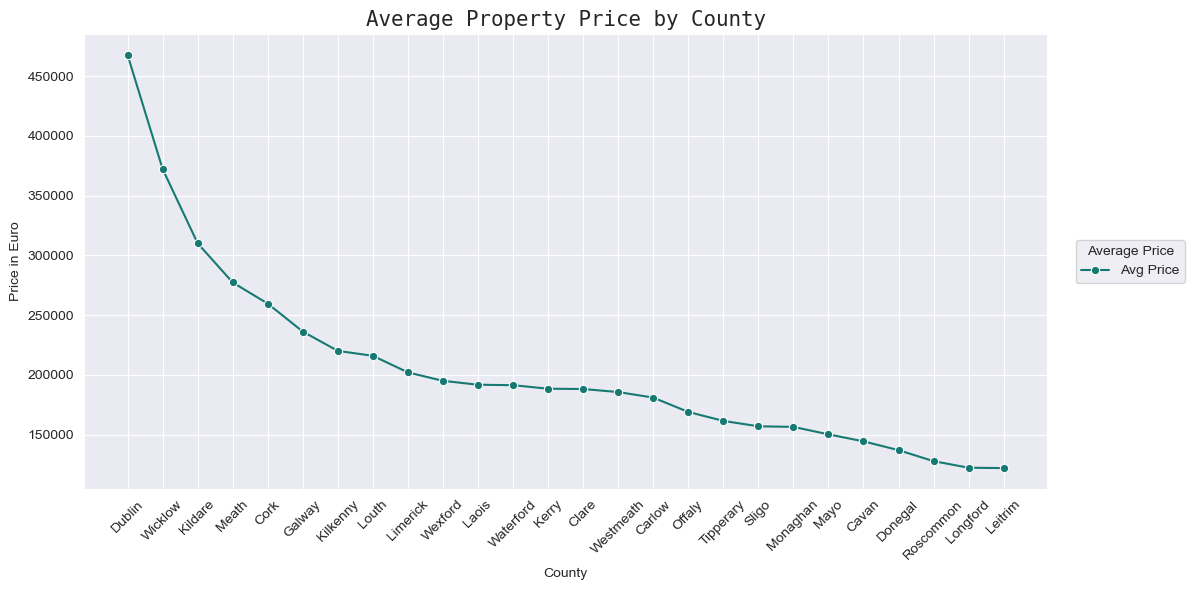

In [30]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=avg_price_by_county, marker='o', label='Avg Price')
plt.title('Average Property Price by County', family="monospace", fontsize=15)
#plt.xlabel=("County")
#plt.ylabel=("Average Price") 
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)                         
plt.tight_layout()
plt.show()

#### 5.1.2 Number of property sales by county

In [25]:
county_counts.info()

<class 'pandas.core.series.Series'>
Index: 26 entries, Monaghan to Dublin
Series name: count
Non-Null Count  Dtype
--------------  -----
26 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [16]:
county_counts = df["County"].value_counts().sort_values()
print(county_counts)

County
Monaghan       5475
Longford       5954
Leitrim        6224
Carlow         7677
Offaly         8806
Roscommon      9976
Sligo         10208
Cavan         10466
Kilkenny      11024
Laois         11194
Westmeath     13446
Clare         15650
Mayo          16667
Tipperary     18684
Donegal       18693
Louth         18966
Waterford     19128
Kerry         19460
Wicklow       23105
Wexford       24193
Limerick      25602
Meath         28622
Galway        33874
Kildare       37418
Cork          76338
Dublin       217653
Name: count, dtype: int64


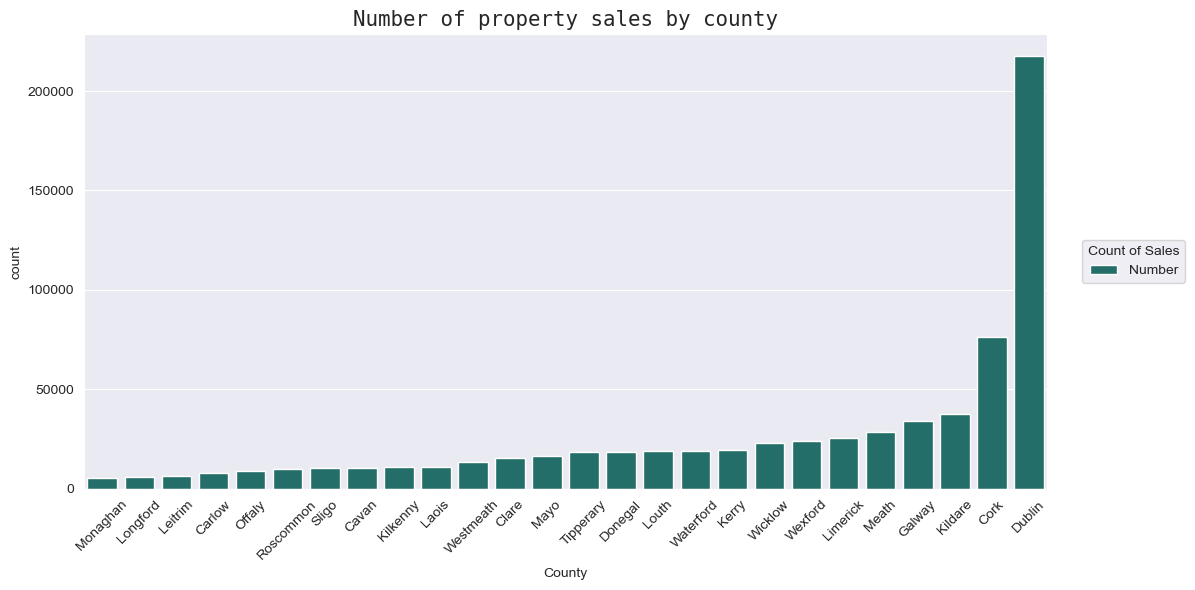

In [31]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.barplot(data=county_counts, label="Number")
plt.title("Number of property sales by county", family="monospace", fontsize=15)
#plt.xlabel=("County")
#plt.ylabel=("Count") 
plt.legend(title="Count of Sales",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)                         
plt.tight_layout()
plt.show()

Playing around

TypeError: 'str' object is not callable

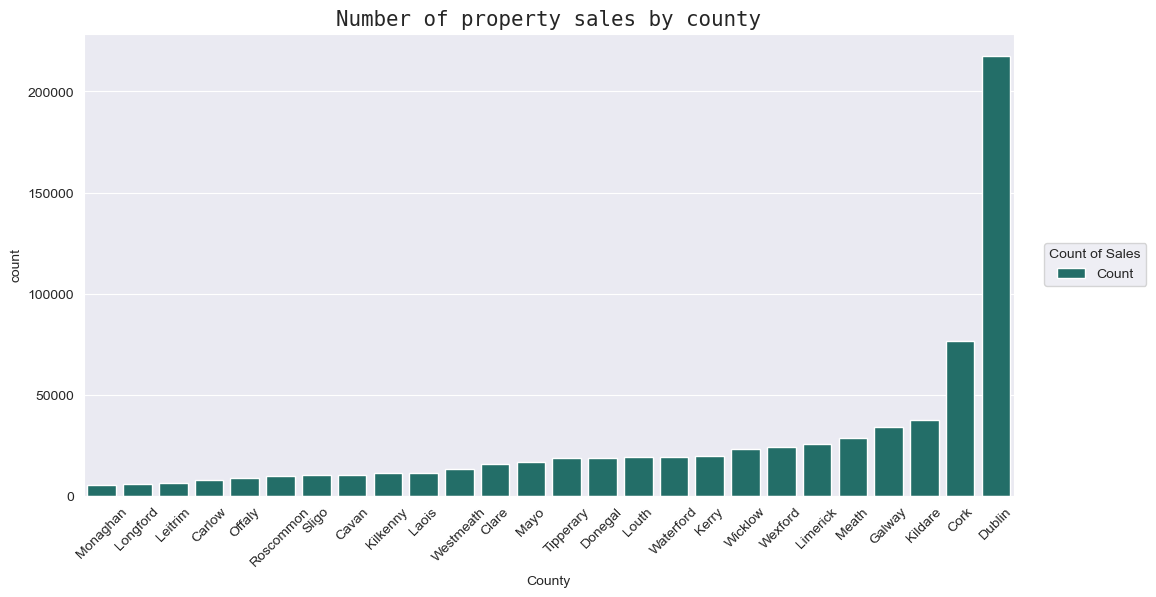

In [23]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.barplot(data=county_counts,label="Count")
plt.title("Number of property sales by county", family="monospace", fontsize=15)
plt.legend(title="Count of Sales",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)   
plt.xlabel("County")
plt.ylabel("Count")                       
plt.tight_layout()
plt.show()

#### 5.1.3 Average property prices by year (2010-2024)

In [63]:
avg_price_by_month = df.groupby("Year")["Price in Euro"].mean().round().sort_values()
print(avg_price_by_month)

Year
2012    193576.0
2013    205914.0
2011    214570.0
2014    214599.0
2015    220101.0
2010    242910.0
2016    244594.0
2017    265698.0
2018    293751.0
2019    306668.0
2020    317559.0
2021    339473.0
2022    378150.0
2023    389107.0
2024    405453.0
Name: Price in Euro, dtype: float64


#### 5.1.4 Average property prices by month (2010-2024)

In [64]:
avg_price_by_month = df.groupby("Month")["Price in Euro"].mean().round().sort_values()
print(avg_price_by_month)

Month
5     282617.0
1     283823.0
3     287168.0
4     288848.0
2     293714.0
11    295199.0
12    300688.0
6     303963.0
8     304590.0
7     306255.0
10    306818.0
9     307859.0
Name: Price in Euro, dtype: float64


#### 5.1.5 Number of occurrences of each property type

In [65]:
description_of_property_counts = df["Description of Property"].value_counts().sort_values()
print(description_of_property_counts)

Description of Property
Teach/?ras?n C?naithe Nua                     1
Teach/arasan Conaithe Nua                     3
Teach/arasan Conaithe Athaimhe               40
New Dwelling house /Apartment            117508
Second-Hand Dwelling house /Apartment    576951
Name: count, dtype: int64


#### 5.1.6 Average property prices by property type (2010-2024)

In [66]:
avg_price_by_property_type = df.groupby("Description of Property")["Price in Euro"].mean().round().sort_values()
print(avg_price_by_property_type)

Description of Property
Teach/?ras?n C?naithe Nua                115045.0
Teach/arasan Conaithe Nua                253318.0
Second-Hand Dwelling house /Apartment    281047.0
Teach/arasan Conaithe Athaimhe           326982.0
New Dwelling house /Apartment            379966.0
Name: Price in Euro, dtype: float64


#### 5.1.7 Full Market price comparison

In [67]:
full_market_price_counts = df["Not Full Market Price"].value_counts()
print(full_market_price_counts)

Not Full Market Price
No     659594
Yes     34909
Name: count, dtype: int64


#### 5.1.8 County with the highest and lowest average property prices

In [68]:
highest_avg_price_county = avg_price_by_county.idxmax()
highest_avg_price = int(avg_price_by_county.max())
#print(highest_avg_price_county)
#print(int(highest_avg_price))
print(f"{highest_avg_price_county} has the highest average property price in Ireland, with an average price of €{highest_avg_price}.")

Dublin has the highest average property price in Ireland, with an average price of €467700.


In [69]:
lowest_avg_price_county = avg_price_by_county.idxmin()
lowest_avg_price = int(avg_price_by_county.min())
#print(lowest_avg_price_county)
#print(lowest_avg_price)
print(f"{lowest_avg_price_county} has the lowest average property price in Ireland, with an average price of €{lowest_avg_price}.")

Leitrim has the lowest average property price in Ireland, with an average price of €122075.


### 5.2 Analysis of Property Prices for all years in Mayo (2010-2024)


#### 5.2.1 Data Preparation for Analysis

In [70]:
df_mayo = df[df["County"] == "Mayo"]
print(df_mayo)

       Date of Sale (dd/mm/yyyy)                                     Address  \
30                    04/01/2010    CARROWTRASNA, CARROWMORE LACKEN, BALLINA   
35                    04/01/2010  No. 11 Blackrock Court, Quay Road, Ballina   
46                    05/01/2010   13  Slievemore Apartments, Dugort, Achill   
232                   11/01/2010           33, St. Patrick's Estate, Ballina   
246                   11/01/2010                          Lawaus, Ballindine   
...                          ...                                         ...   
694316                20/11/2024           27 GLENBROOK, KILTIMAGH RD, KNOCK   
694366                20/11/2024             KNOCKANANY, MOYGOWNAGH, BALLINA   
694442                21/11/2024                KNAPPAGH BEG, WESTPORT, MAYO   
694460                22/11/2024       14 OAK VIEW, TURLOUGH ROAD, CASTLEBAR   
694476                22/11/2024               4 MEADOW PARK, SWINFORD, MAYO   

       County  Eircode  Price in Euro N

Before the analysis, I need to set the `Date of Sale` from Object to datetime. 

In [71]:
df_mayo["Date of Sale (dd/mm/yyyy)"]

30        04/01/2010
35        04/01/2010
46        05/01/2010
232       11/01/2010
246       11/01/2010
             ...    
694316    20/11/2024
694366    20/11/2024
694442    21/11/2024
694460    22/11/2024
694476    22/11/2024
Name: Date of Sale (dd/mm/yyyy), Length: 16667, dtype: object

In [72]:
df_mayo["Date of Sale"] = pd.to_datetime(df_mayo["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")

C:\Users\curleys\AppData\Local\Temp\ipykernel_28328\1248909470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayo["Date of Sale"] = pd.to_datetime(df_mayo["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")


In [73]:
df_mayo["Date of Sale"]

30       2010-01-04
35       2010-01-04
46       2010-01-05
232      2010-01-11
246      2010-01-11
            ...    
694316   2024-11-20
694366   2024-11-20
694442   2024-11-21
694460   2024-11-22
694476   2024-11-22
Name: Date of Sale, Length: 16667, dtype: datetime64[ns]

Set the index to datetime

In [74]:
df_mayo.set_index("Date of Sale", inplace=True)

#### 5.2.2 Average Mayo Property Price by Year

In [75]:
yearly_mayo = df_mayo["Price in Euro"].resample("Y").mean().round()
print(yearly_mayo)

Date of Sale
2010-12-31    158670.0
2011-12-31    139631.0
2012-12-31    107723.0
2013-12-31    109648.0
2014-12-31    106284.0
2015-12-31    113996.0
2016-12-31    112528.0
2017-12-31    131097.0
2018-12-31    133454.0
2019-12-31    139966.0
2020-12-31    145103.0
2021-12-31    166571.0
2022-12-31    194082.0
2023-12-31    204554.0
2024-12-31    222443.0
Freq: YE-DEC, Name: Price in Euro, dtype: float64


C:\Users\curleys\AppData\Local\Temp\ipykernel_28328\1804604448.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mayo = df_mayo["Price in Euro"].resample("Y").mean().round()


#### 5.2.3 Average Mayo Property Price by Month

In [76]:
monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()
print(monthly_mayo)

Date of Sale
2010-01-31    137536.0
2010-02-28    162933.0
2010-03-31    176979.0
2010-04-30    171499.0
2010-05-31    156450.0
                ...   
2024-07-31    251376.0
2024-08-31    223248.0
2024-09-30    218310.0
2024-10-31    235069.0
2024-11-30    212091.0
Freq: ME, Name: Price in Euro, Length: 179, dtype: float64


C:\Users\curleys\AppData\Local\Temp\ipykernel_28328\4182137341.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()


#### 5.2.4 Average Mayo Property Price by month in 2024

In [27]:
df_mayo_2024=df_mayo[df_mayo.index.year==2024]
print(df_mayo_2024)

             Date of Sale (dd/mm/yyyy)  \
Date of Sale                             
2024-01-02                  02/01/2024   
2024-01-02                  02/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
...                                ...   
2024-11-20                  20/11/2024   
2024-11-20                  20/11/2024   
2024-11-21                  21/11/2024   
2024-11-22                  22/11/2024   
2024-11-22                  22/11/2024   

                                                  Address County  Eircode  \
Date of Sale                                                                
2024-01-02    151 GREENHILLS ESTATE, BALLINA, COUNTY MAYO   Mayo  F26V1K2   
2024-01-02           BOHAUN COTTAGE, KILLAVALLY, WESTPORT   Mayo  F28F653   
2024-01-03                15 THE WILLOWS, CASTLEBAR, MAYO   Mayo  F23FH50   
2024-01-03              26 BARLEYHILL COURT, BOHOLA, MAYO   Mayo  F1

Before the analysis, I need to set the `Date of Sale` from Object to datetime. 

In [77]:
df_mayo_2024["Date of Sale (dd/mm/yyyy)"]

Date of Sale
2024-01-02    02/01/2024
2024-01-02    02/01/2024
2024-01-03    03/01/2024
2024-01-03    03/01/2024
2024-01-03    03/01/2024
                 ...    
2024-11-20    20/11/2024
2024-11-20    20/11/2024
2024-11-21    21/11/2024
2024-11-22    22/11/2024
2024-11-22    22/11/2024
Name: Date of Sale (dd/mm/yyyy), Length: 1170, dtype: object

In [78]:
df_mayo_2024["Date of Sale"] = pd.to_datetime(df_mayo_2024["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")
print(df_mayo_2024)

             Date of Sale (dd/mm/yyyy)  \
Date of Sale                             
2024-01-02                  02/01/2024   
2024-01-02                  02/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
...                                ...   
2024-11-20                  20/11/2024   
2024-11-20                  20/11/2024   
2024-11-21                  21/11/2024   
2024-11-22                  22/11/2024   
2024-11-22                  22/11/2024   

                                                  Address County  Eircode  \
Date of Sale                                                                
2024-01-02    151 GREENHILLS ESTATE, BALLINA, COUNTY MAYO   Mayo  F26V1K2   
2024-01-02           BOHAUN COTTAGE, KILLAVALLY, WESTPORT   Mayo  F28F653   
2024-01-03                15 THE WILLOWS, CASTLEBAR, MAYO   Mayo  F23FH50   
2024-01-03              26 BARLEYHILL COURT, BOHOLA, MAYO   Mayo  F1

Set the new datetime column as the index

In [79]:
df_mayo_2024.set_index("Date of Sale", inplace=True)

In [80]:
monthly_mayo_2024 = df_mayo_2024["Price in Euro"].resample("M").mean().round()
print(monthly_mayo_2024)

Date of Sale
2024-01-31    188234.0
2024-02-29    198817.0
2024-03-31    230541.0
2024-04-30    227639.0
2024-05-31    211512.0
2024-06-30    239625.0
2024-07-31    251376.0
2024-08-31    223248.0
2024-09-30    218310.0
2024-10-31    235069.0
2024-11-30    212091.0
Freq: ME, Name: Price in Euro, dtype: float64


C:\Users\curleys\AppData\Local\Temp\ipykernel_28328\2823886978.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mayo_2024 = df_mayo_2024["Price in Euro"].resample("M").mean().round()


#### 5.2.5 Number of property sales in Mayo in 2024

In [81]:
mayo_counts = df_mayo_2024["County"].value_counts().sort_values()
print(mayo_counts)

County
Mayo    1170
Name: count, dtype: int64


#### 5.2.6 Number of occurrences of each property type in Mayo

In [82]:
description_of_property_counts_mayo = df_mayo_2024["Description of Property"].value_counts().sort_values()
print(description_of_property_counts_mayo)

Description of Property
New Dwelling house /Apartment              76
Second-Hand Dwelling house /Apartment    1094
Name: count, dtype: int64


#### 5.2.7 Average proprety price by property type in Mayo in 2024

In [83]:
avg_price_by_property_type_mayo = df_mayo_2024.groupby("Description of Property")["Price in Euro"].mean().round().sort_values()
print(avg_price_by_property_type_mayo)

Description of Property
Second-Hand Dwelling house /Apartment    211878.0
New Dwelling house /Apartment            374523.0
Name: Price in Euro, dtype: float64


#### 5.2.8  Full Market price comparison in Mayo

In [84]:
full_market_price_counts_mayo = df_mayo_2024["Not Full Market Price"].value_counts()
print(full_market_price_counts_mayo)

Not Full Market Price
No     1140
Yes      30
Name: count, dtype: int64


### 5.3 Analysis of Property Prices in Castlebar (2010-2024)

#### 5.3.1

In [90]:
df_castlebar_addresses = df_mayo_2024 [df_mayo_2024 ["Address"].str.contains(r"Castlebar", case=False, na=False)] 
print(df_castlebar_addresses)


             Date of Sale (dd/mm/yyyy)  \
Date of Sale                             
2024-01-03                  03/01/2024   
2024-01-04                  04/01/2024   
2024-01-12                  12/01/2024   
2024-01-15                  15/01/2024   
2024-01-16                  16/01/2024   
...                                ...   
2024-11-08                  08/11/2024   
2024-11-08                  08/11/2024   
2024-11-12                  12/11/2024   
2024-11-18                  18/11/2024   
2024-11-22                  22/11/2024   

                                                Address County  Eircode  \
Date of Sale                                                              
2024-01-03              15 THE WILLOWS, CASTLEBAR, MAYO   Mayo  F23FH50   
2024-01-04            45 MANOR VILLAGE, CASTLEBAR, MAYO   Mayo  F23C856   
2024-01-12              CLOONDUANE, BELCARRA, CASTLEBAR   Mayo      NaN   
2024-01-15             59 RIVERDALE CT, CASTLEBAR, MAYO   Mayo  F23TY01   
202

#### 5.3.2

#### 5.3.1 

***
## End

